In [21]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [24]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b3a91bb66e4b29f47822c3bd361becd5


In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | rincon
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | taltal
Processing Record 7 of Set 1 | ha tinh
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | rapid valley
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | dingle
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | oliveira dos brejinhos
Processing Record 18 of Set 1 | puerto escondido
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | hambantota
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of 

In [28]:
len(city_data)

585

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,28.0170,-97.5169,81.84,33,6,7.27,US,2021-09-23 01:19:54
1,Rincon,32.2960,-81.2354,77.86,98,75,5.75,US,2021-09-23 01:21:11
2,East London,-33.0153,27.9116,60.73,76,100,18.70,ZA,2021-09-23 01:21:33
3,Ushuaia,-54.8000,-68.3000,38.86,87,20,0.00,AR,2021-09-23 01:21:33
4,Geraldton,-28.7667,114.6000,72.01,33,0,14.97,AU,2021-09-23 01:21:34
5,Taltal,-25.4000,-70.4833,60.04,65,0,3.98,CL,2021-09-23 01:21:34
6,Ha Tinh,18.3333,105.9000,79.83,84,46,4.47,VN,2021-09-23 01:18:08
7,Butaritari,3.0707,172.7902,83.01,66,98,12.77,KI,2021-09-23 01:18:05
8,Mahebourg,-20.4081,57.7000,70.09,78,75,10.36,MU,2021-09-23 01:17:59
9,Rapid Valley,44.0625,-103.1463,73.00,25,1,12.66,US,2021-09-23 01:21:35


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2021-09-23 01:19:54,28.0170,-97.5169,81.84,33,6,7.27
1,Rincon,US,2021-09-23 01:21:11,32.2960,-81.2354,77.86,98,75,5.75
2,East London,ZA,2021-09-23 01:21:33,-33.0153,27.9116,60.73,76,100,18.70
3,Ushuaia,AR,2021-09-23 01:21:33,-54.8000,-68.3000,38.86,87,20,0.00
4,Geraldton,AU,2021-09-23 01:21:34,-28.7667,114.6000,72.01,33,0,14.97
...,...,...,...,...,...,...,...,...,...
580,Marsa Matruh,EG,2021-09-23 01:25:47,31.3525,27.2453,75.40,88,0,8.05
581,Soyo,AO,2021-09-23 01:25:47,-6.1349,12.3689,74.86,80,100,7.70
582,Vapnyarka,UA,2021-09-23 01:25:48,48.5348,28.7436,41.88,93,100,10.92
583,Aiea,US,2021-09-23 01:25:48,21.3822,-157.9336,87.42,55,20,10.00


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

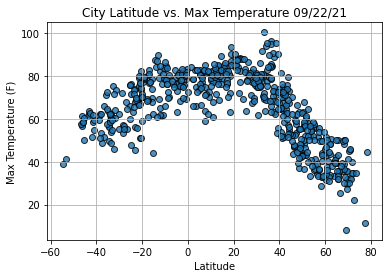

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

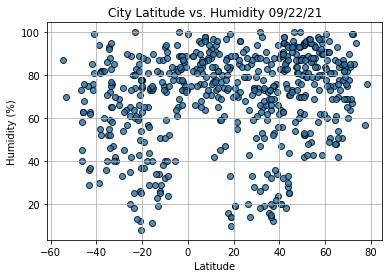

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

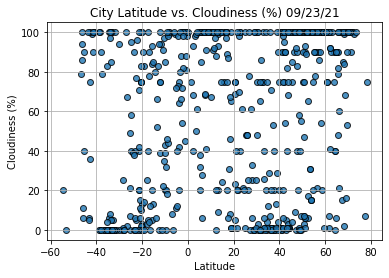

In [38]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

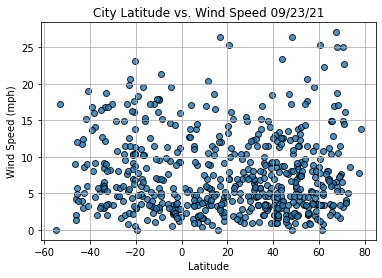

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

    city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

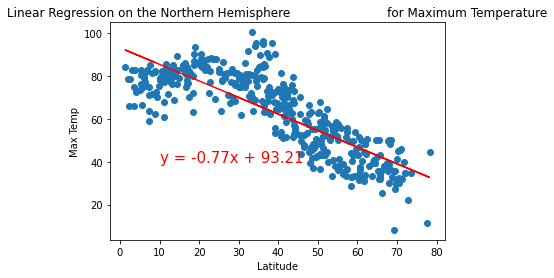

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

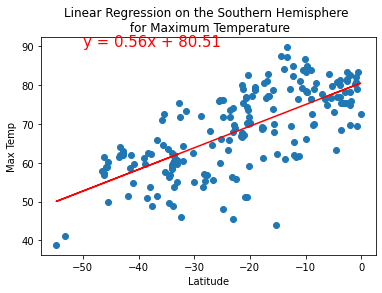

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

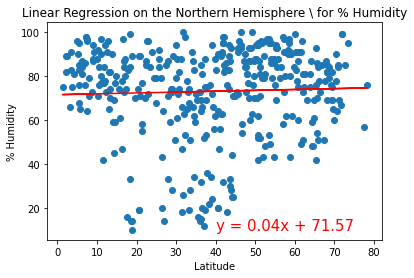

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

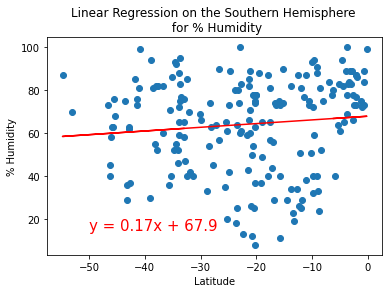

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

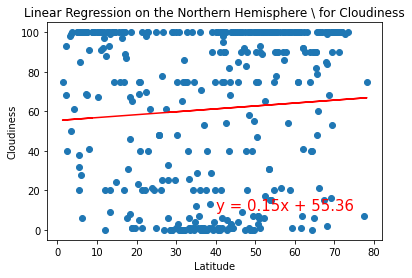

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for %Cloudiness', '%Cloudiness',(-40,10))

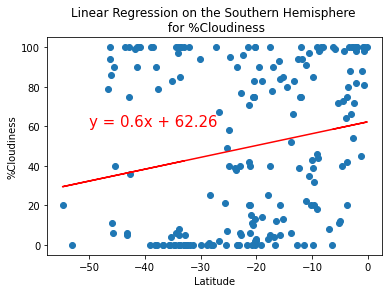

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for %Cloudiness', '%Cloudiness',(-50,60))

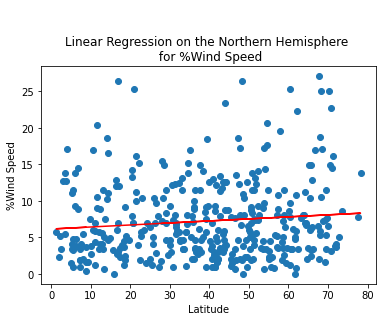

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for %Wind Speed', '%Wind Speed',(40,35))

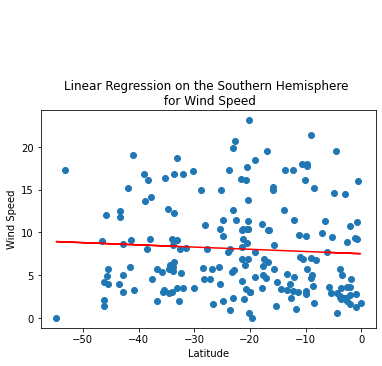

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [15]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [16]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


san patricio mx
rincon us
east london za
ushuaia ar
geraldton au
taltal cl
ha tinh vn
barentsburg sj
butaritari ki
mahebourg mu
rapid valley us
kapaa us
dingle ie
olafsvik is
qaanaaq gl
sao filipe cv
oliveira dos brejinhos br
puerto escondido mx
ponta do sol cv
hambantota lk
hermanus za
mar del plata ar
tasiilaq gl
aldan ru
tiksi ru
vaini to
hobart au
ancud cl
iqaluit ca
fortuna us
ostrovnoy ru
gimli ca
luena ao
jalu ly
djibo bf
monrovia lr
kavaratti in
touros br
ribeira grande pt
ambon id
cabo san lucas mx
chokurdakh ru
hithadhoo mv
vaini to
soe id
lagodekhi ge
atuona pf
srednekolymsk ru
cape town za
mataura pf
busselton au
deputatskiy ru
rikitea pf
punta arenas cl
puerto ayora ec
port hueneme us
jamestown sh
ribeira grande pt
punta arenas cl
hermanus za
lazaro cardenas mx
hithadhoo mv
ushuaia ar
port elizabeth za
brae gb
pevek ru
carnarvon au
vaini to
port elizabeth za
avarua ck
khatanga ru
benguela ao
guerrero negro mx
butaritari ki
imbituba br
albany au
buraydah sa
talnakh ru
ushua

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640